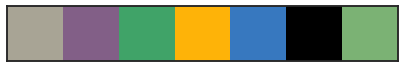

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.ticker as ticker
import statsmodels.formula.api as smf
from pprint import pprint
import re as re

from statsmodels.regression.mixed_linear_model import MixedLMResults

import scipy as sp
#from scipy.stats import nanmean
#from scipy.stats import nanstd
import copy
import scipy.stats as stats
import string

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pprint import pprint
import seaborn as sns
sns.set(style="white", context="talk")
custom_palette = [ "greyish", "dusty purple", "greenish", "amber", "windows blue", "black","faded green"]  
                     #"green blue", "dull green", "faded green",  
sns.set_palette(sns.xkcd_palette(custom_palette))
current_palette = sns.color_palette()
%matplotlib inline
sns.palplot(current_palette)

import warnings
warnings.filterwarnings('ignore')


In [2]:
round_data = pd.read_csv('./all_studies_round_data.csv')

round_data['group'] = 1 #this is only for the crossed mixed effect model

game_rounds = pd.read_csv('./all_studies_game_data.csv')
#round_data = round_data[round_data.round_index > 3]
#print(round_data.size)
conditions = ['dynamic_full_feedback',
              'dynamic',         
              'dynamic_self_feedback',
              'dynamic_no_feedback',
              'static',
              'solo_feedback',
              'solo_no_feedback'
             ]


colors ={'dynamic_no_feedback':'#196FFF',
         'dynamic_self_feedback':'#000000',
         'dynamic_full_feedback':'#E89468',
         'dynamic': '#81B200',
         'static':'#9B59B6',
         'solo_feedback': '#95A5A6',
         'solo_no_feedback': '#95A5A6'
        }


linestyles ={'dynamic_no_feedback':'-.',
         'dynamic_self_feedback':':',
         'dynamic_full_feedback':'-',
         'dynamic': '-',
         'static':'--',
         'solo_feedback': '-',
         'solo_no_feedback': '-'
        }

markers ={'dynamic_no_feedback':'d',
         'dynamic_self_feedback':'^',
         'dynamic_full_feedback':'p',
         'dynamic': 'o',
         'static':'*',
         'solo_feedback': 'H',
         'solo_no_feedback': 'h'
        }

#markers = ['s','o','*']
#linestyles = ['--','-',':','-.']
tick_size = 25
label_size = 35




studies = [1,2]
#crossed model with no independent groups https://stackoverflow.com/questions/50052421/mixed-models-with-two-random-effects-statsmodels
# this is used as a variance component for the individual level stuff
vcf = {"player_id": "0 + C(player_id)", "game_id": "0 + C(game_id)"} 


# Statistical Tests for study 2

## Table S2: Solo vs dynamic no feedback (individual)

In [11]:
#### Study 2 Solo vs Dynamic no feedback

print("solo vs dynamic no feedback (individual) : over all")

forumla = "revised_error ~ C(condition, Treatment('solo_no_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_full_feedback','dynamic_self_feedback'])) &
                  (round_data.revised_error.notnull())]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')



reduced_error = (data[data.condition == 'dynamic_no_feedback'].revised_error.mean() - data[data.condition == 'solo_no_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_no_feedback'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())

print('=============================')


print("solo vs dynamic no feedback: first half")

forumla = "revised_error ~ C(condition, Treatment('solo_no_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_full_feedback','dynamic_self_feedback'])) &
                  (round_data.revised_error.notnull()) &
                  (round_data.half==1)
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_no_feedback'].revised_error.mean() - data[data.condition == 'solo_no_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_no_feedback'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())

print('=============================')

print("solo vs dynamic no feedback (individual): second half")

forumla = "revised_error ~ C(condition, Treatment('solo_no_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_full_feedback','dynamic_self_feedback'])) &
                  (round_data.revised_error.notnull()) &
                  (round_data.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_no_feedback'].revised_error.mean() - data[data.condition == 'solo_no_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_no_feedback'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())


print('=============================')

print("solo vs dynamic no feedback (individual): adapted periods")
forumla = "revised_error ~ C(condition, Treatment('solo_no_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_full_feedback','dynamic_self_feedback'])) &
                  (round_data.revised_error.notnull()) &
                  (round_data.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_no_feedback'].revised_error.mean() - data[data.condition == 'solo_no_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_no_feedback'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')

solo vs dynamic no feedback (individual) : over all
 β:  -0.04799017966371462 , t-statistic -4.5404985355881875 , pvalue  5.612136869274955e-06  ci  -0.06870575153655138 -0.027274607790877856 reduced error by  -23.073262303358728
solo vs dynamic no feedback: first half
 β:  -0.04227247084347075 , t-statistic -3.6661175350172224 , pvalue  0.00024626077490999326  ci  -0.06487199734510349 -0.019672944341838017 reduced error by  -21.223944051907946
solo vs dynamic no feedback (individual): second half
 β:  -0.05389885302728884 , t-statistic -3.9083385521793015 , pvalue  9.293301816955817e-05  ci  -0.08092819281736376 -0.026869513237213923 reduced error by  -24.734773392824636
solo vs dynamic no feedback (individual): adapted periods
 β:  -0.04160410261002409 , t-statistic -4.101598197967833 , pvalue  4.103063109049347e-05  ci  -0.06148477809041535 -0.02172342712963283 reduced error by  -20.23231645088945


## Table S2: Solo vs dynamic no feedback (group)

In [12]:
#### Study 2 Solo vs Dynamic no feedback

print("solo vs dynamic no feedback (group): over all")

forumla = "revised_wisdom_error ~ C(condition, Treatment('solo_no_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_full_feedback','dynamic_self_feedback']))
                  ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean() - data[data.condition == 'solo_no_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())

print('=============================')


print("solo vs dynamic no feedback (group): first half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('solo_no_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_full_feedback','dynamic_self_feedback'])) &
                  (game_rounds.half==1)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean() - data[data.condition == 'solo_no_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())

#print(model.summary())

print('=============================')

print("solo vs dynamic no feedback (group): second half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('solo_no_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_full_feedback','dynamic_self_feedback'])) &
                  (game_rounds.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean() - data[data.condition == 'solo_no_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())

#print(model.summary())


print('=============================')
print("solo vs dynamic no feedback (group): adapted periods")

forumla = "revised_wisdom_error ~ C(condition, Treatment('solo_no_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_full_feedback','dynamic_self_feedback'])) &
                  (game_rounds.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean() - data[data.condition == 'solo_no_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())

solo vs dynamic no feedback (group): over all
 β:  -0.03101231734006802 , t-statistic -4.547534873643473 , pvalue  5.427792846000033e-06  ci  -0.044378465539600384 -0.01764616914053566 reduced error by  -17.52603410006682
solo vs dynamic no feedback (group): first half
 β:  -0.02613844612794651 , t-statistic -2.984259778623684 , pvalue  0.002842653143576798  ci  -0.04330532060368087 -0.00897157165221215 reduced error by  -15.538204525125018
solo vs dynamic no feedback (group): second half
 β:  -0.03588618855218838 , t-statistic -3.6221895700900344 , pvalue  0.00029211991565651646  ci  -0.055304177518170225 -0.016468199586206534 reduced error by  -19.326952909877825
solo vs dynamic no feedback (group): adapted periods
 β:  -0.024547976430976462 , t-statistic -2.47982976004466 , pvalue  0.01314451236257879  ci  -0.04394977185792766 -0.005146181004025269 reduced error by  -14.193808319559384


##  Table S2:  dynamic no feedback vs dynamic self feedback (individual)

In [13]:
#### Study 2 dynamic no fedback vs dynamic self feedback

print("dynamic no feedback vs dynamic self feedback (individual): over all")

forumla = "revised_error ~ C(condition, Treatment('dynamic_no_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_full_feedback','solo_no_feedback'])) &
                  (round_data.revised_error.notnull())]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_self_feedback'].revised_error.mean() - data[data.condition == 'dynamic_no_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_self_feedback'].revised_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())

print('=============================')


print("dynamic no feedback vs dynamic self feedback (individual): first half")

forumla = "revised_error ~ C(condition, Treatment('dynamic_no_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_full_feedback','solo_no_feedback'])) &
                  (round_data.revised_error.notnull()) &
                  (round_data.half==1)
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_self_feedback'].revised_error.mean() - data[data.condition == 'dynamic_no_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_self_feedback'].revised_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())

print('=============================')

print("dynamic no feedback vs dynamic self feedback (individual): second half")

forumla = "revised_error ~ C(condition, Treatment('dynamic_no_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_full_feedback','solo_no_feedback'])) &
                  (round_data.revised_error.notnull()) &
                  (round_data.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_self_feedback'].revised_error.mean() - data[data.condition == 'dynamic_no_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_self_feedback'].revised_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())


print('=============================')

print("dynamic no feedback vs dynamic self feedback (individual): adapted periods")
forumla = "revised_error ~ C(condition, Treatment('dynamic_no_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_full_feedback','solo_no_feedback'])) &
                  (round_data.revised_error.notnull()) &
                  (round_data.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_self_feedback'].revised_error.mean() - data[data.condition == 'dynamic_no_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_self_feedback'].revised_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())

dynamic no feedback vs dynamic self feedback (individual): over all
 β:  -0.014501775840543359 , t-statistic -1.3771712490407815 , pvalue  0.1684593085852789  ci  -0.03514042799011084 0.006136876309024122 reduced error by  -7.381813654599785
dynamic no feedback vs dynamic self feedback (individual): first half
 β:  -0.010516261456367628 , t-statistic -0.87179762006812 , pvalue  0.3833187931766716  ci  -0.03415878264709623 0.013126259734360974 reduced error by  -5.548284690254318
dynamic no feedback vs dynamic self feedback (individual): second half
 β:  -0.01838964749226939 , t-statistic -1.3191731646205391 , pvalue  0.1871112275632718  ci  -0.04571210048016286 0.008932805495624078 reduced error by  -9.130284595958415
dynamic no feedback vs dynamic self feedback (individual): adapted periods
 β:  -0.03677095684431783 , t-statistic -3.524075258796028 , pvalue  0.000424963528870179  ci  -0.05722164129325369 -0.01632027239538197 reduced error by  -21.628549556967002


##  Table S2:  dynamic no feedback vs dynamic self feedback (group)

In [14]:
#### Study 2 dynamic no fedback vs dynamic self feedback

print("dynamic no feedback vs dynamic self feedback (group): over all")

forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic_no_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_full_feedback','solo_no_feedback']))]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean() - data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())

print('=============================')


print("dynamic no feedback vs dynamic self feedback (group): first half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic_no_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_full_feedback','solo_no_feedback'])) &
                  (game_rounds.half==1)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean() - data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())

print('=============================')

print("dynamic no feedback vs dynamic self feedback (group): second half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic_no_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_full_feedback','solo_no_feedback'])) &
                  (game_rounds.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean() - data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())


print('=============================')

print("dynamic no feedback vs dynamic self feedback (group): adapted periods")
forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic_no_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_full_feedback','solo_no_feedback'])) &
                  (game_rounds.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean() - data[data.condition == 'dynamic_no_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())

dynamic no feedback vs dynamic self feedback (group): over all
 β:  -0.018645707070706775 , t-statistic -1.6649849224524635 , pvalue  0.09591576394383117  ci  -0.04059480332500784 0.003303389183594286 reduced error by  -11.778396356588527
dynamic no feedback vs dynamic self feedback (group): first half
 β:  -0.011440707070707028 , t-statistic -0.9335775539406351 , pvalue  0.35052184822441046  ci  -0.03545946557835254 0.012578051436938485 reduced error by  -7.2973094863798496
dynamic no feedback vs dynamic self feedback (group): second half
 β:  -0.025850707070706976 , t-statistic -1.6561833541182212 , pvalue  0.09768469316826806  ci  -0.05644300514416288 0.004741591002748929 reduced error by  -16.17399932377144
dynamic no feedback vs dynamic self feedback (group): adapted periods
 β:  -0.03835050505050507 , t-statistic -2.935087846191384 , pvalue  0.00333453270609237  ci  -0.06395982668816831 -0.012741183412841837 reduced error by  -28.492630504607813


##  Table S2:  dynamic self feedback vs dynamic full feedback (individual)

In [15]:
#### Study 1 Solo vs Static

print("dynamic self feedback vs dynamic full feedback (individual): over all")

forumla = "revised_error ~ C(condition, Treatment('dynamic_self_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_no_feedback','solo_no_feedback'])) &
                  (round_data.revised_error.notnull())]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_full_feedback'].revised_error.mean() - data[data.condition == 'dynamic_self_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_full_feedback'].revised_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())

print('=============================')


print("dynamic self feedback vs dynamic full feedback (individual): first half")

forumla = "revised_error ~ C(condition, Treatment('dynamic_self_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_no_feedback','solo_no_feedback'])) &
                  (round_data.revised_error.notnull()) &
                  (round_data.half==1)
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_full_feedback'].revised_error.mean() - data[data.condition == 'dynamic_self_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_full_feedback'].revised_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())
#print(model.summary())

print('=============================')

print("dynamic self feedback vs dynamic full feedback (individual): second half")

forumla = "revised_error ~ C(condition, Treatment('dynamic_self_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_no_feedback','solo_no_feedback'])) &
                  (round_data.revised_error.notnull()) &
                  (round_data.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_full_feedback'].revised_error.mean() - data[data.condition == 'dynamic_self_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_full_feedback'].revised_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())
#print(model.summary())


print('=============================')

print("dynamic self feedback vs dynamic full feedback (individual): adapted periods")
forumla = "revised_error ~ C(condition, Treatment('dynamic_self_feedback'))"
data = round_data[(round_data.study==2) &
                  (~round_data.condition.isin(['dynamic_no_feedback','solo_no_feedback'])) &
                  (round_data.revised_error.notnull()) &
                  (round_data.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_full_feedback'].revised_error.mean() - data[data.condition == 'dynamic_self_feedback'].revised_error.mean() ) / data[data.condition == 'dynamic_full_feedback'].revised_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())

dynamic self feedback vs dynamic full feedback (individual): over all
 β:  -0.03200019432749047 , t-statistic -3.294833493746869 , pvalue  0.0009848001315186  ci  -0.05103582344173753 -0.01296456521324341 reduced error by  -19.76390644678898
dynamic self feedback vs dynamic full feedback (individual): first half
 β:  -0.036377930444661026 , t-statistic -3.6363492387637915 , pvalue  0.00027652936366632413  ci  -0.05598535229061046 -0.01677050859871159 reduced error by  -23.717570878590678
dynamic self feedback vs dynamic full feedback (individual): second half
 β:  -0.027571074806374635 , t-statistic -1.88761864200954 , pvalue  0.05907716558741152  ci  -0.05619884549740006 0.0010566958846507934 reduced error by  -16.24386895113932
dynamic self feedback vs dynamic full feedback (individual): adapted periods
 β:  -0.041490550185891435 , t-statistic -4.988130755655522 , pvalue  6.096630168073345e-07  ci  -0.05779324713722908 -0.025187853234553786 reduced error by  -32.517701639164684


##  Table S2:  dynamic self feedback vs dynamic full feedback (group)

In [16]:
#### Study 2 dynamic self feedback vs dynamic full feedback

print("dynamic self feedback vs dynamic full feedback (group): over all")
forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic_self_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_no_feedback','solo_no_feedback']))]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_full_feedback'].revised_wisdom_error.mean() - data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_full_feedback'].revised_wisdom_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())#print(model.summary())

print('=============================')


print("dynamic self feedback vs dynamic full feedback (group): first half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic_self_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_no_feedback','solo_no_feedback'])) &
                  (game_rounds.half==1)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_full_feedback'].revised_wisdom_error.mean() - data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_full_feedback'].revised_wisdom_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())#print(model.summary())

print('=============================')

print("dynamic self feedback vs dynamic full feedback (group): second half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic_self_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_no_feedback','solo_no_feedback'])) &
                  (game_rounds.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_full_feedback'].revised_wisdom_error.mean() - data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_full_feedback'].revised_wisdom_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())#print(model.summary())


print('=============================')

print("dynamic self feedback vs dynamic full feedback (group): adapted periods")
forumla = "revised_wisdom_error ~ C(condition, Treatment('dynamic_self_feedback'))"
data = game_rounds[(game_rounds.study==2) &
                  (~game_rounds.condition.isin(['dynamic_no_feedback','solo_no_feedback'])) &
                  (game_rounds.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic_full_feedback'].revised_wisdom_error.mean() - data[data.condition == 'dynamic_self_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic_full_feedback'].revised_wisdom_error.mean()
print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')#print(model.summary())#print(model.summary())

dynamic self feedback vs dynamic full feedback (group): over all
 β:  -0.021740435305434968 , t-statistic -2.2520838189830874 , pvalue  0.024316975645446635  ci  -0.0406608990322762 -0.002819971578593733 reduced error by  -15.919611296654832
dynamic self feedback vs dynamic full feedback (group): first half
 β:  -0.03144639249639255 , t-statistic -2.8608923322238446 , pvalue  0.004224504928631609  ci  -0.05298994939380661 -0.00990283559897849 reduced error by  -25.090192335479223
dynamic self feedback vs dynamic full feedback (group): second half
 β:  -0.012034478114478131 , t-statistic -0.7665905243346921 , pvalue  0.44332501106832445  ci  -0.042803373539559764 0.018734417310603498 reduced error by  -8.142720875837133
dynamic self feedback vs dynamic full feedback (group): adapted periods
 β:  -0.02993710437710449 , t-statistic -2.9916917596855948 , pvalue  0.0027743623456864255  ci  -0.04954996930230239 -0.010324239451906584 reduced error by  -28.60391168783709
